# PROYECTO FINAL APRENDIZAJE AUTOMÁTICO

---

## EXPLORACIÓN DEL DATASET

**Autor**: Andrés Gil Vicente

**Fecha de entrega**: 04/05/2025

---

### Objetivos:

Este fichero tiene como finalidad llevar a cabo una exploración inicial del conjunto del dataset con el objetivo de comprender su estructura, distribución, relaciones entre variables y posibles patrones ocultos. Este análisis nos permitirá identificar características relevantes, anomalías, outliers y relaciones estadísticas que nos ayuden a tomar decisiones importantes en la posterior selección de modelos.

Durante esta fase, se realizarán distintas visualizaciones y análisis que permitirán obtener una comprensión profunda del comportamiento de los datos:

- Histogramas y kde para analizar la distribución de las variables numéricas.

- Boxplots, útiles para comparar la distribución de variables numéricas en función de las distintas categorías.

- Matriz de correlaciones acompañada de un heatmap para detectar relaciones lineales y posibles redundancias entre variables numéricas.

- Detección de outliers y valores atípicos, a través de métodos visuales como boxplots.

- Distribución de la variable objetivo, en función de distintas variables independientes, para evaluar su comportamiento previo a cualquier modelado.

- Violin plots y pairplots para confirmar las correlaciones de ciertas variables con la variable objetivo.

Además, también se realizarán gráficos tratando de encontrar variables que puedan estar fuertemente relacionadas con la variable de target, o que nos permitan obtener información sobre qué modelo podría funcionar bien para el apartado de Modelo2, donde no podremos emplear ni T1, ni T2.

---

### Resultados:

Este análisis visual nos ayudará a tomar decisiones más informadas y fundamentadas sobre cómo preprocesar el dataset, así como decidir cuáles son los modelos que mejor rendimiento nos pueden dar.



### Importamos las librerías necesarias:

In [ ]:
from funciones import*   
 

### Cargamos los datos:

In [18]:
# Cargamos los datos
carpeta_datos = "data"
df_train = pd.read_csv(f"{carpeta_datos}/rendimiento_estudiantes_train.csv", delimiter=",")

In [19]:
# Definimos cúal es la variable objetivo, importante de cara al planteamiento del análisis
variable_objetivo = "T3"


In [20]:
# Extraemos cúales son las variables que tienen valores numércio y queremos explorar
indices_columnas_numericas = np.where(df_train.dtypes != object)
columnas_numericas = list(df_train.columns[indices_columnas_numericas])


### Hacemos una primera exploración de los datos:

In [21]:
# Estadísticas descriptivas de las columnas numéricas
df_train.describe()

,edad,Medu,Pedu,TiempoViaje,TiempoEstudio,suspensos,RelFam,TiempoLib,SalAm,AlcSem,AlcFin,salud,faltas,T1,T2,T3
count,835.000000,783.000000,731.000000,835.000000,819.000000,835.000000,818.000000,835.000000,835.000000,815.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,16.755689,2.628352,2.410397,1.520958,1.957265,0.283832,3.904645,3.201198,3.132934,1.505521,2.276647,3.553293,9.682235,11.204790,11.238323,11.326946
std,1.244730,1.115372,1.114586,0.711656,0.829988,0.680079,0.950786,1.030819,1.147536,0.920504,1.274682,1.425352,33.985657,3.066016,3.381352,3.993061
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,7.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,246.036983,19.000000,19.000000,20.000000


In [22]:
# Resumen del DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   escuela        835 non-null    object 
 1   sexo           835 non-null    object 
 2   edad           835 non-null    int64  
 3   entorno        835 non-null    object 
 4   TamFam         835 non-null    object 
 5   EstPadres      835 non-null    object 
 6   Medu           783 non-null    float64
 7   Pedu           731 non-null    float64
 8   Mtrab          835 non-null    object 
 9   Ptrab          835 non-null    object 
 10  razon          835 non-null    object 
 11  tutor          835 non-null    object 
 12  TiempoViaje    835 non-null    int64  
 13  TiempoEstudio  819 non-null    float64
 14  suspensos      835 non-null    int64  
 15  apoyo          835 non-null    object 
 16  ApFam          835 non-null    object 
 17  academia       835 non-null    object 
 18  extras    

### Exploramos los valores nulos que hay en cada variable:

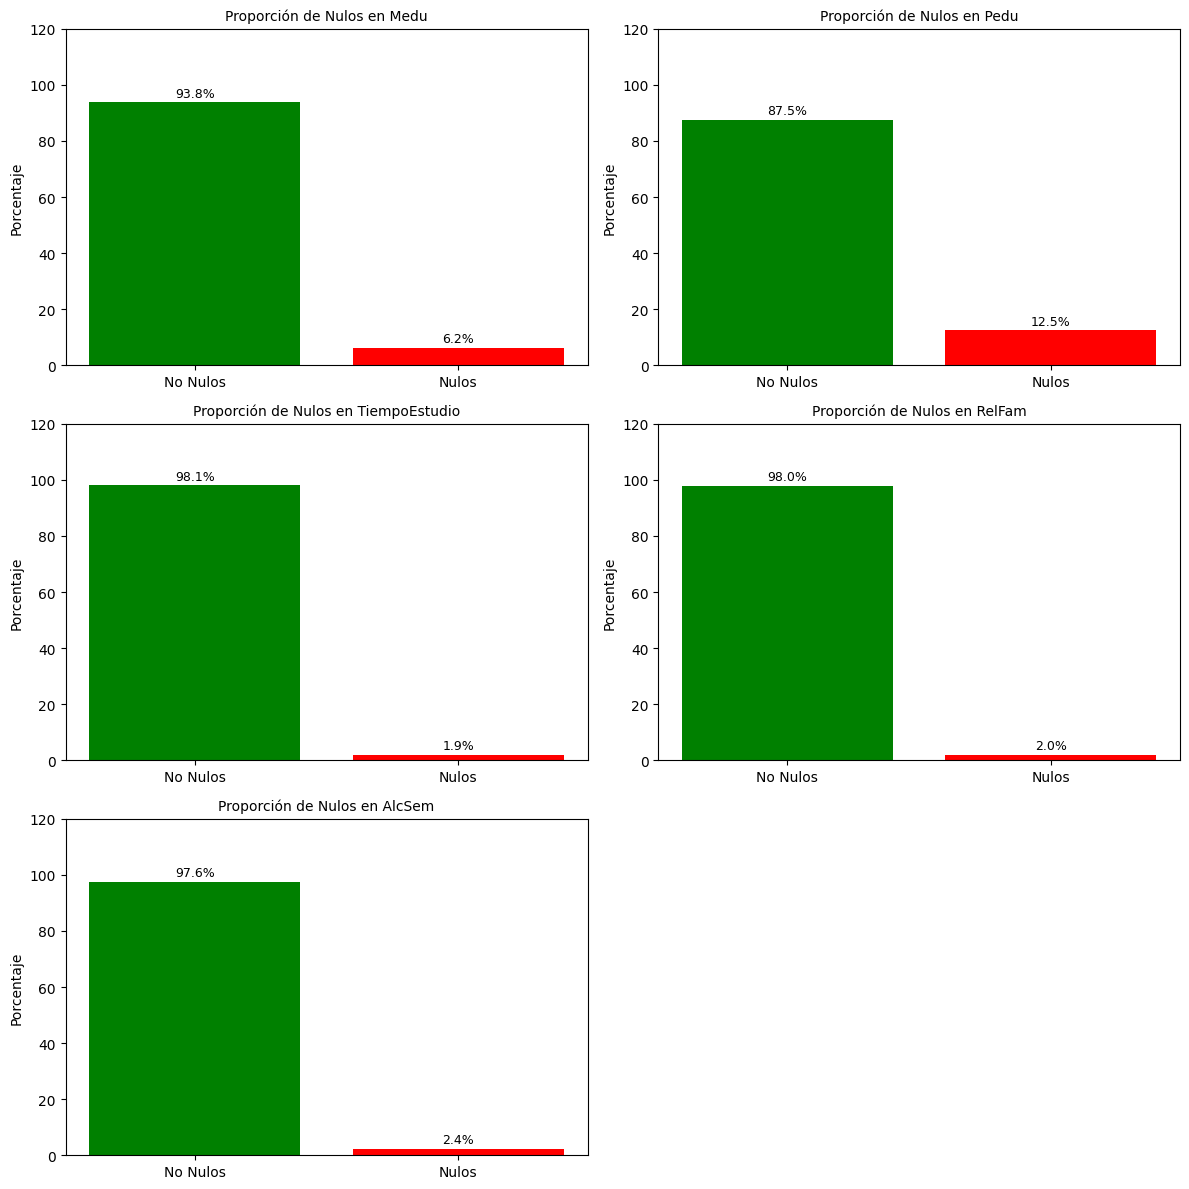

In [23]:
def plot_missing_values(df):
    # Filtrar columnas con valores nulos
    columnas_con_nulos = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_cols = 2  # Número de gráficos por fila
    n = len(columnas_con_nulos)  # Número total de columnas con nulos

    if n == 0:
        print("No hay columnas con valores nulos.")
        return

    n_rows = math.ceil(n / n_cols)  # Número de filas necesarias

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(columnas_con_nulos):
        total = len(df)
        missing = df[col].isnull().sum()
        not_missing = total - missing

        # Porcentajes
        missing_pct = (missing / total) * 100
        not_missing_pct = (not_missing / total) * 100

        # Datos para el gráfico
        data = [not_missing_pct, missing_pct]
        labels = ['No Nulos', 'Nulos']
        colors = ['green', 'red']

        # Gráfico de barras
        axes[i].bar(labels, data, color=colors)
        axes[i].set_title(f'Proporción de Nulos en {col}', fontsize=10)
        axes[i].set_ylabel('Porcentaje')
        axes[i].set_ylim(0, 120)

        # Añadir leyenda con porcentajes
        for j, pct in enumerate(data):
            axes[i].text(j, pct + 2, f'{pct:.1f}%', ha='center', fontsize=9, color='black')

    # Ocultar subplots vacíos si sobran
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_missing_values(df_train)

En el gráfico anterior, se observa que varias columnas del dataset presentan valores nulos. A continuación, se destacan las principales observaciones:

- **Variables con valores nulos significativos**:
    - `Medu` y `Pedu` (nivel educativo de los padres)
    
- **Variables con algunos valores nulos**:
    - `TiempoEstudio` (tiempo de estudio)
    - `RelFam` (relación familiar)
    - `AlcSem` (consumo de alcohol entre semana)

- **Variables sin valores nulos**:

    - El resto de variables no presentan valores nulos lo cual es una buena señal, que nos facilitará el posterior trabajo con los datos.

- **Conclusiones**:

Las variables con valores nulos deberán ser tratadas adecuadamente durante el preprocesamiento de datos. Esto nos podría llevar a incluir imputación de valores, eliminación de filas o columnas, etc.
El tratamiento de los valores nulos será clave para garantizar la calidad del dataset y la robustez de los modelos que se desarrollen posteriormente.


### Generamos boxplots para analizar valores atípicos / outliers:

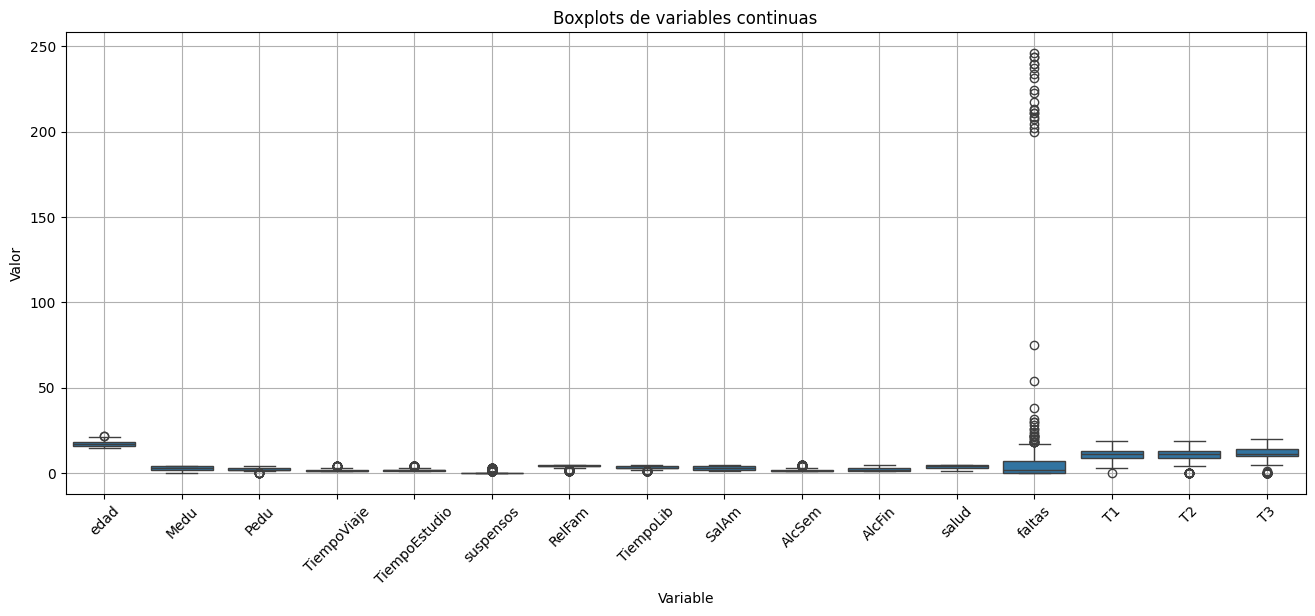

In [24]:
# Subset del DataFrame solo con esas columnas
data = df_train[columnas_numericas]

# Convertimos a formato largo para usar con seaborn
data_long = data.melt(var_name='Variable', value_name='Valor')

plt.figure(figsize=(16, 6))
sns.boxplot(x='Variable', y='Valor', data=data_long)
plt.title('Boxplots de variables continuas')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Aquí observamos que la variable **`faltas`** presenta numerosos **outliers** con valores razonablemente altos. El tratamiento de dichos valores será clave para garantizar la calidad del dataset y mejorar el rendimiento de los modelos que se desarrollen posteriormente. Esto nos lleva a plantearnos cómo trabajar con los outliers durante el preprocesamiento de los datos. Algunas opciones son:

1. **Eliminar los datos con outliers**:
    - Esta opción implicaría descartar las filas con valores extremos.
    - **Desventaja**: Perderíamos información que podría ser valiosa para entrenar nuestro modelo.

2. **Aplicar un "clip" superior**:
    - Consiste en limitar los valores superiores de la columna a un máximo razonable.
    - **Ventaja**: Conservamos la tendencia de los datos con valores notablemente altos, pero los ajustamos a valores físicamente posibles.
    - **Justificación**:
        - Por ejemplo, faltar **250 días** es imposible, ya que no hay tantos días de clase en un año.
        - Al aplicar un "clip", podemos mantener la información relevante sin introducir valores irreales en el modelo.

4. **Transformación de los datos**:  
    - Aplicar transformaciones como logaritmos, raíces cuadradas o escalado robusto para reducir el impacto de los valores extremos.  
    - **Ventaja**: Los valores atípicos no se eliminan ni se recortan, pero su influencia se reduce, lo que puede mejorar el rendimiento de los modelos.  
    - **Justificación**: Esto es útil cuando los valores extremos son parte natural de la distribución de los datos y no se deben eliminar.

5. **Imputación de valores**:  
    - Sustituir los valores atípicos por la mediana, media o algún percentil de la distribución.  
    - **Ventaja**: Conservamos la estructura del dataset sin eliminar filas.  
    - **Justificación**: Es útil cuando los valores extremos son errores o no representan información relevante.

6. **Modelos robustos a outliers**:  
    - Utilizar algoritmos de aprendizaje automático que sean menos sensibles a los valores extremos, como árboles de decisión o modelos basados en medianas.  
    - **Ventaja**: No es necesario modificar los datos directamente.  
    - **Justificación**: Permite trabajar con los datos originales sin necesidad de preprocesamiento adicional.


### Generamos histogramas para analizar las distribuciones de las variables numéricas:

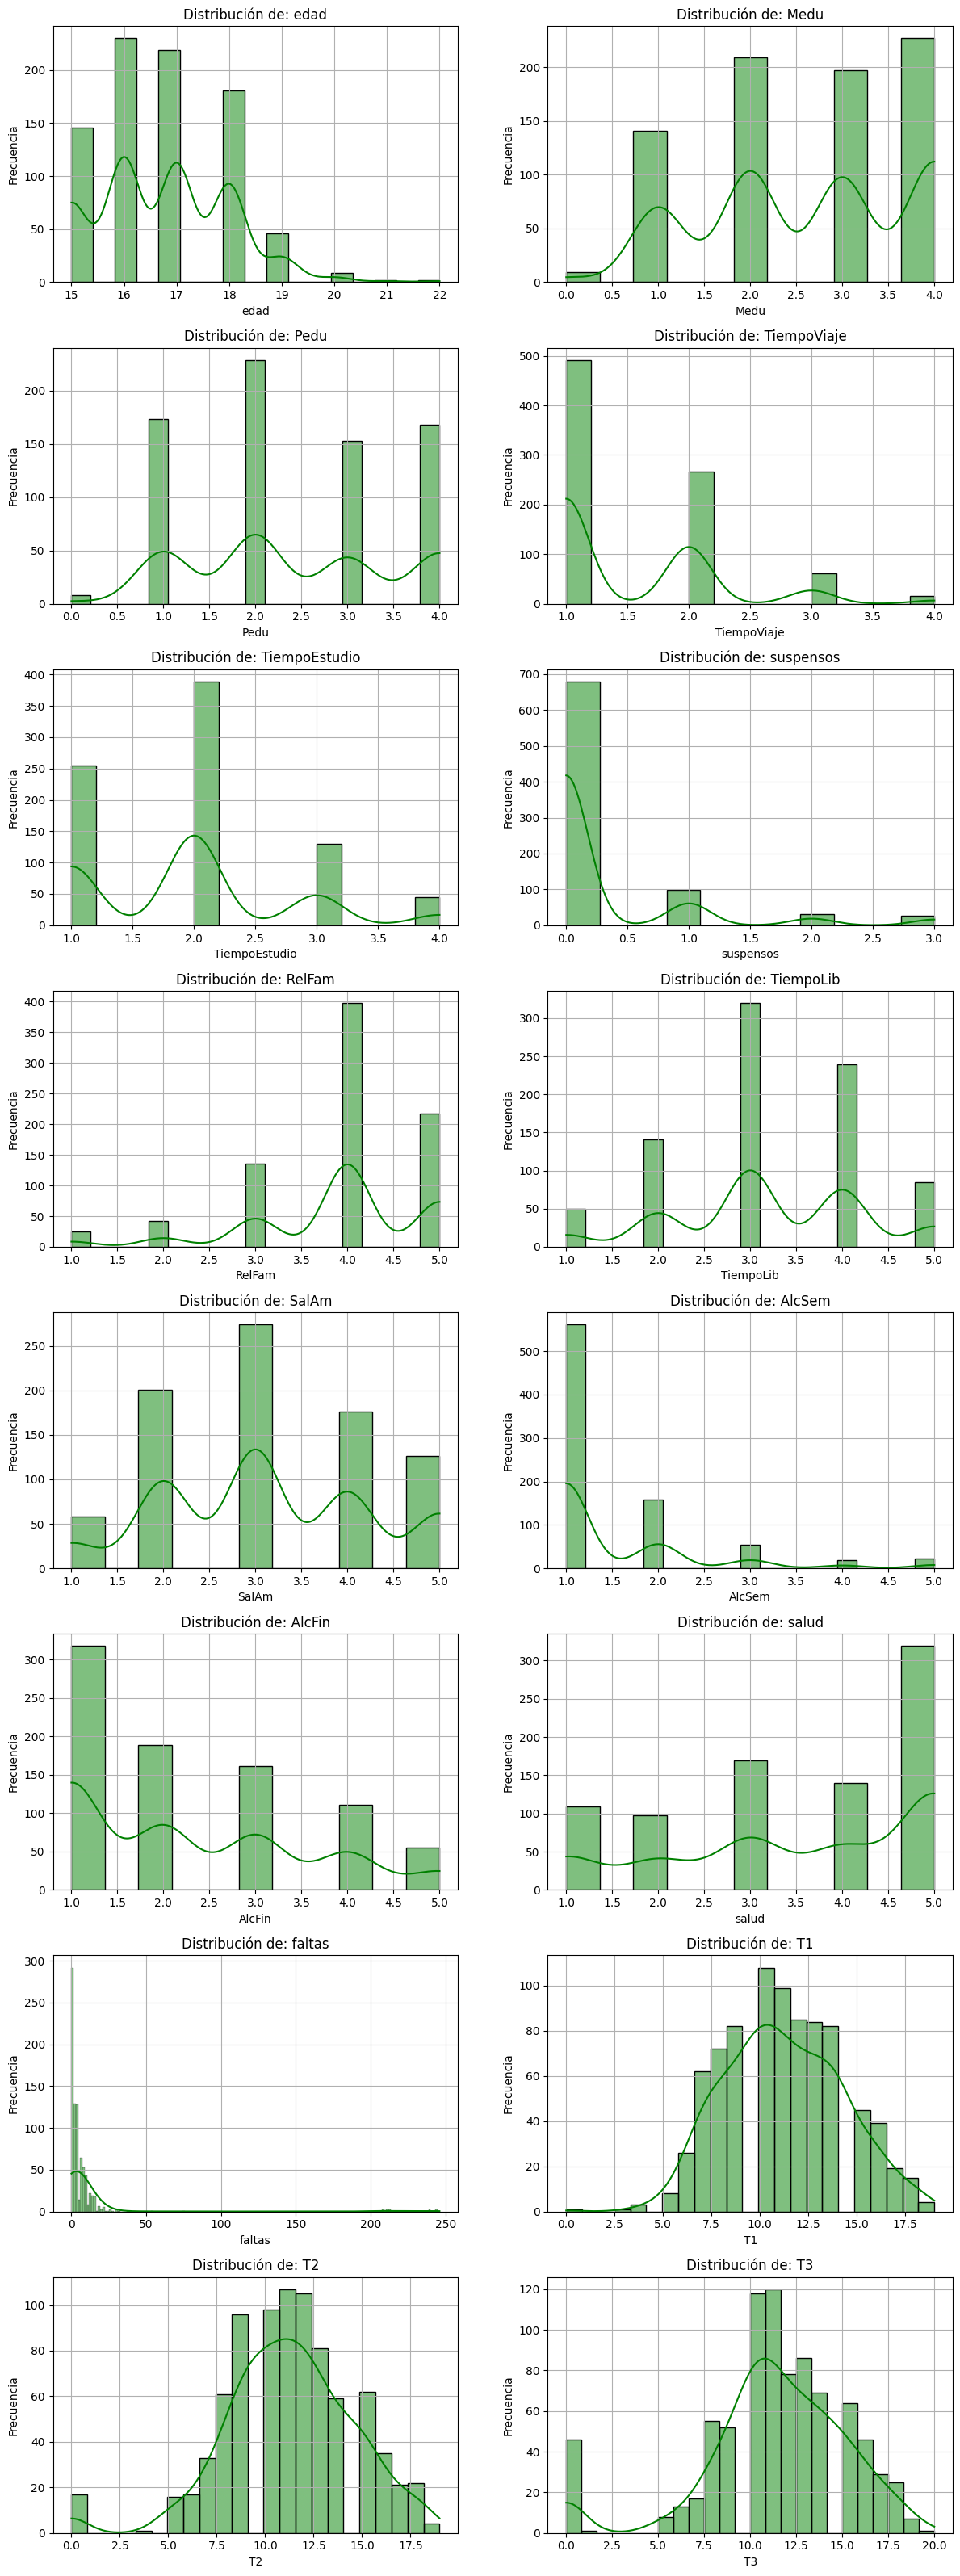

In [25]:
def multiple_histograms(df, columnas_numericas, excluir=[]):
    columnas = [col for col in columnas_numericas if col not in excluir]
    n = len(columnas)
    n_cols = 2  
    n_rows = math.ceil(n / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))  
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        sns.histplot(df[col], kde=True, ax=axes[i], color="green")
        axes[i].set_title(f'Distribución de: {col}', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
        axes[i].grid(True)

    # Eliminar ejes vacíos si sobran
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(w_pad=4)  
    plt.show()

multiple_histograms(df_train, columnas_numericas)

1. **Distribuciones de las notas (`T1`, `T2`, `T3`)**:
    - Las distribuciones de las calificaciones están centradas en valores cercanos a 10 y son aproximadamente simétricas, lo cual es esperable dado que representan evaluaciones académicas.

2. **Distribución de las faltas**:
    - La variable `faltas` muestra una distribución claramente asimétrica, con la mayoría de los valores centrados en cero, pero con algunos outliers que representan valores extremadamente altos, tendremos que trabajar con ellos.

3. **Resto de histogramas**:
    - Los histogramas de las demás variables no aportan demasiada información relevante adicional para el análisis del dataset.


### Generamos una matriz de correlaciones para analizar posibles relaciones entre las variables del dataset:

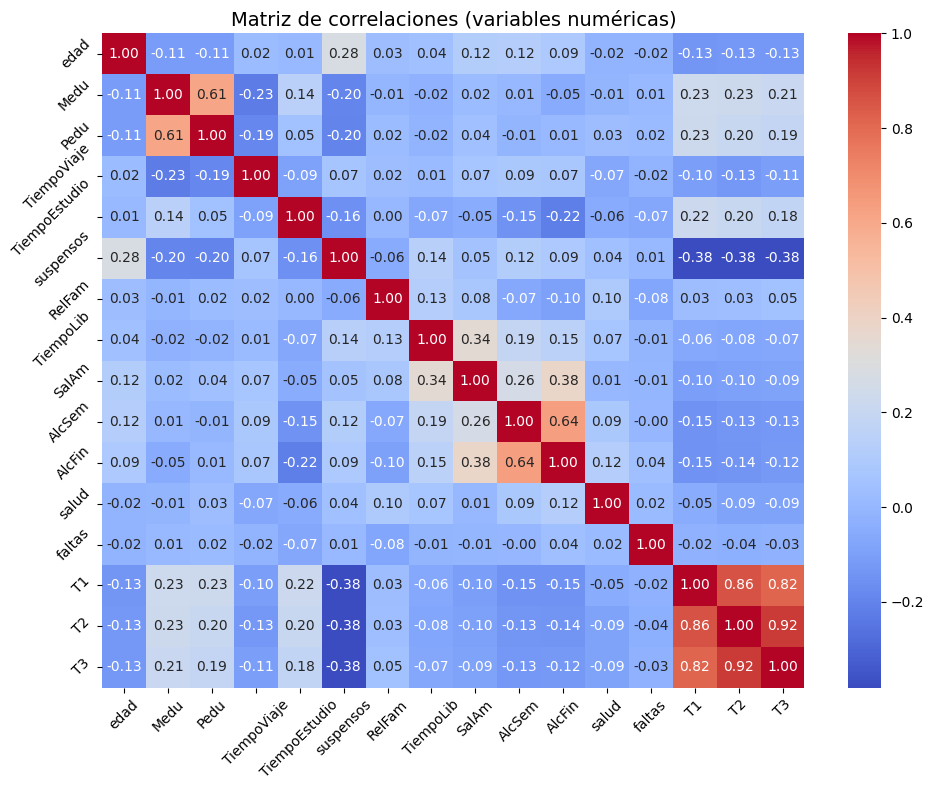

In [26]:
plt.figure(figsize=(10, 8))  
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaciones (variables numéricas)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


#### Observaciones importantes sobre la matriz de correlaciones:

1. **Correlaciones entre las calificaciones (`T1`, `T2`, `T3`)**:
    - Existe una **alta correlación positiva** entre las variables `T1`, `T2` y `T3` (valores cercanos a 0.8 o superiores). Esto es esperable, ya que estas variables representan evaluaciones académicas consecutivas, y el desempeño de un estudiante en una evaluación suele estar relacionado con su desempeño en las demás. Esto significa que estas variables tendrán mucha importancia cuando construyamos nuestro modelo de predicción de T3, por lo que debemos tenerlo en cuenta.

2. **Correlación entre `suspensos` y `T3`**:
    - Se observa una **ligera correlación negativa** entre `suspensos` y `T3`, `T2`, `T1`. Esto sugiere que los estudiantes con más asignaturas suspendidas tienden a tener peores calificaciones finales. Esta variable también podría ser un indicador importante del rendimiento académico.
    
2. **Correlación entre `AlcSem` y `AlcFin`**:  
    - Existe una **notable correlación positiva** entre `AlcSem` y `AlcFin`. Esto indica que los estudiantes que consumen más alcohol entre semana tienden a consumir también más alcohol durante el fin de semana. Es información que podríamos considerarse incluso redundante, por lo que podríamos pensar en eliminar alguna de las variables si fuera necesario.


### Generamos countplots para ver la proporción de las distintas clases de las variables categóricas:

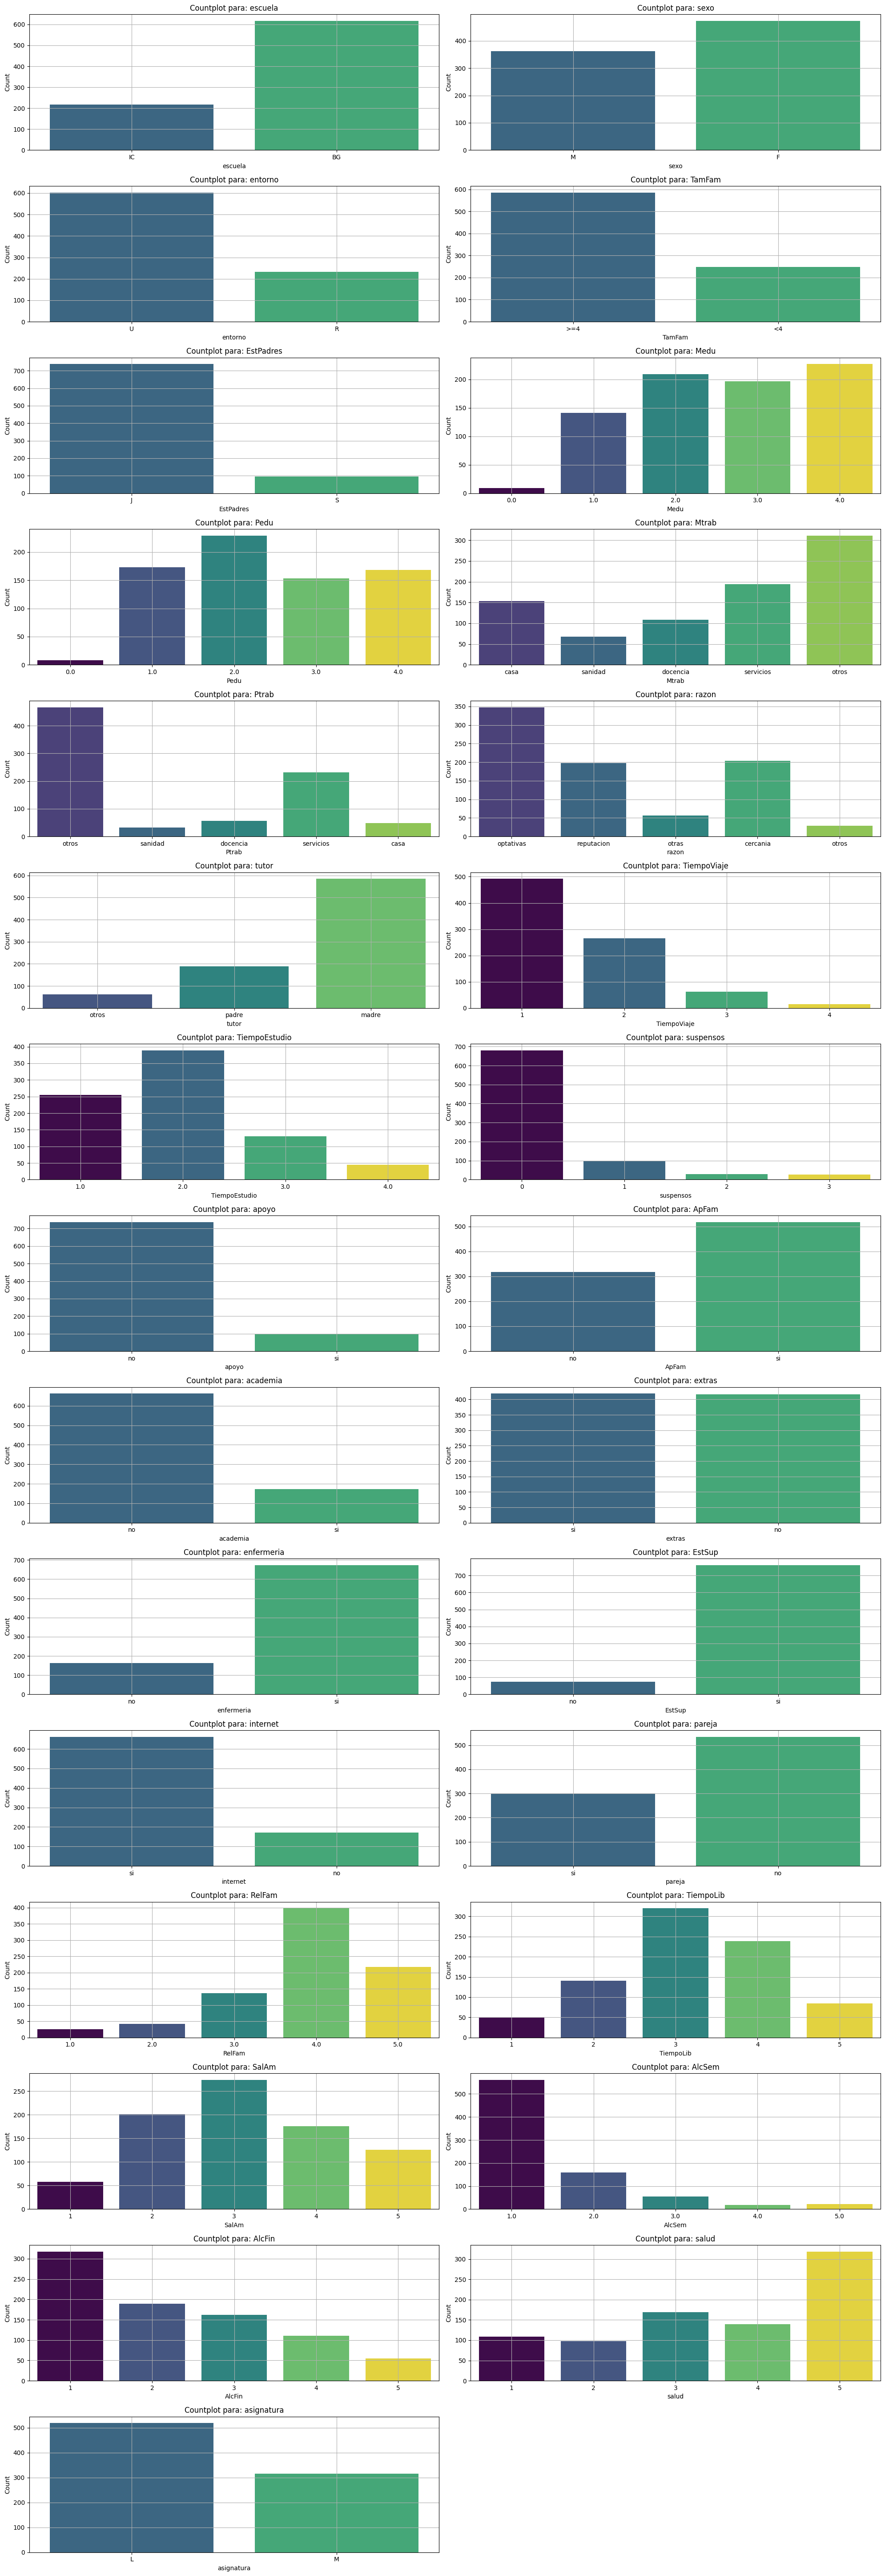

In [27]:
# Filtramos las columnas deseadas
columnas_deseadas = [col for col in df_train.columns if col not in columnas_numericas or df_train[col].nunique() < 8]

# Creamos subplots solo para las columnas deseadas
fig, axes = plt.subplots(nrows=(len(columnas_deseadas) + 1) // 2, ncols=2, figsize=(20, len(columnas_deseadas) * 2))
axes = axes.flatten()

for i, col in enumerate(columnas_deseadas):
    sns.countplot(data=df_train, x=col, ax=axes[i], hue=col, palette="viridis", legend=False)
    axes[i].set_title(f'Countplot para: {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].grid(True)  # Aplicamos grid a todas las gráficas

# Ocultamos subplots no utilizados
for j in range(len(columnas_deseadas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

A continuación, describimos las clases más predominantes en las distintas variables categóricas analizadas mediante los countplots:

1. **`escuela`**:
    - La mayoría de los estudiantes pertenecen a la escuela **BG**, siendo esta la clase predominante.

2. **`sexo`**:
    - Hay una ligera predominancia de estudiantes de sexo **Femenino (F)** en comparación con los de sexo Masculino (M).

3. **`entorno`**:
    - La mayoría de los estudiantes provienen de un entorno **Urbano (U)**, mientras que los de entorno Rural (R) son menos frecuentes.

4. **`TamFam`**:
    - Las familias con tamaño **>=4 miembros** son más comunes que las de tamaño menor a 4.

5. **`EstPadres`**:
    - La mayoría de los estudiantes tienen padres que viven juntos: **J**.

6. **`Medu` y `Pedu`**:
    - En ambas variables, los niveles educativos **3** y **4** (con máster, doctorado o graduados) son los más frecuentes.

7. **`Mtrab` y `Ftrab`**:
    - Las ocupaciones más comunes para las madres y padres son **servicios** y **docencia**, respectivamente.

8. **`razon`**:
    - La razón más común para elegir la escuela es **optativas**, seguida de **cercanía**.

9. **`tutor`**:
    - La mayoría de los estudiantes tienen como tutor a su **madre**.

10. **`TiempoViaje`**:
     - La mayoría de los estudiantes tienen un tiempo de viaje de **1 a 2**, es decir entre 0 y 30 minutos.

11. **`TiempoEstudio`**:
     - El tiempo de estudio más común es de **2**, seguido de **1**, es decir entre 0 y 5 horas semanales.

12. **`suspensos`**:
     - La mayoría de los estudiantes tienen **0 suspensos**, lo que indica un buen rendimiento académico general.

13. **`apoyo` y `ApFam`**:
     - La mayoría de los estudiantes no reciben **apoyo escolar adicional** ni **apoyo familiar**.

14. **`academia` y `extras`**:
     - La mayoría de los estudiantes no asisten a **academias** ni realizan **actividades extracurriculares**.

15. **`enfermeria`**:
     - La mayoría de los estudiantes no han recibido **atención en enfermería**.

16. **`EstSup`**:
     - La mayoría de los estudiantes tienen intención de continuar con **estudios superiores**.

17. **`internet`**:
     - La mayoría de los estudiantes tienen acceso a **internet** en casa.

18. **`pareja`**:
     - La mayoría de los estudiantes no tienen **pareja**.

19. **`RelFam`**:
     - Las relacines familiar son mayoritariamente de una calidad de **4 o 5 unidades**, indicando relaciones familiares positivas.

20. **`TiempoLib`**:
     - La mayoría de los estudiantes tienen **3 o 4 unidades** de tiempo libre, es decir, algo razonable.

21. **`SalAm`**:
     - La mayoría de los estudiantes tienen **3 o 4 unidades** de tiempo dedicado a salir con amigos, lo que quiere decir que lo hacen a menudo.

22. **`AlcSem` y `AlcFin`**:
     - El consumo de alcohol entre semana y durante el fin de semana es predominantemente bajo, con valores de **1 o 2 unidades**, es decir, valores bajos.

23. **`salud`**:
     - La mayoría de los estudiantes califican su estado de salud como **4 o 5 unidades**, indicando un buen estado de salud general.

24. **`asignatura`**:
     - La asignatura más común es **L**, Lengua y Literatura.

### Scatterplots de las distintas variables frente a T3:

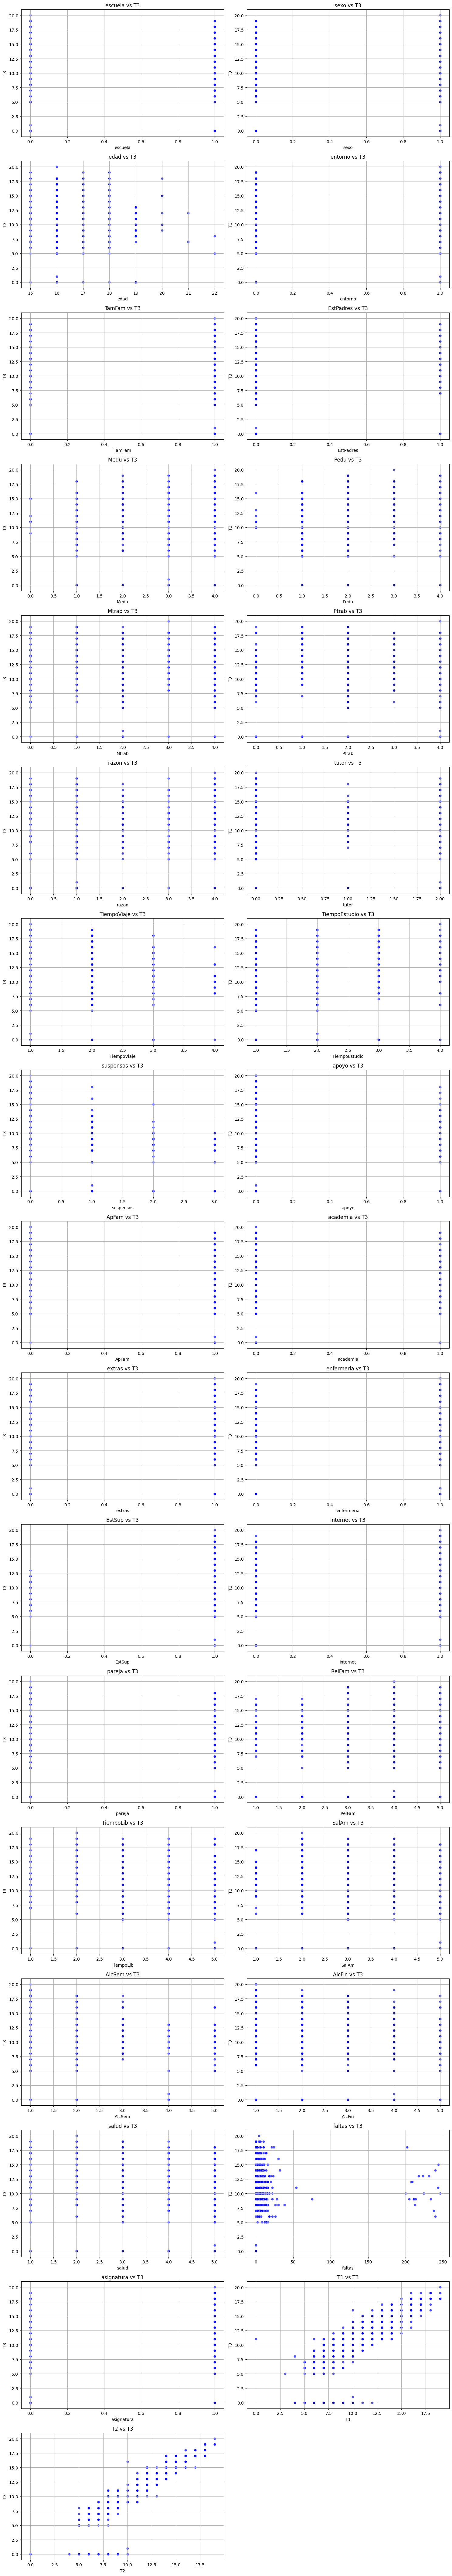

In [28]:
def scatterplots_all_columns(df, variable_objetivo):
    # Codificamos las columnas categóricas como numéricas para mostrar bien el gráfico
    df_encoded = df.copy()
    for col in df_encoded.select_dtypes(include=['object']).columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

    columnas = [col for col in df_encoded.columns if col != variable_objetivo]
    n = len(columnas)
    n_cols = 2  # Número de gráficos por fila
    n_rows = math.ceil(n / n_cols)  # Número de filas necesarias

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        sns.scatterplot(x=df_encoded[col], y=df_encoded[variable_objetivo], ax=axes[i], alpha=0.7, color="blue")
        axes[i].set_title(f'{col} vs {variable_objetivo}', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(variable_objetivo)
        axes[i].grid(True)

    # Ocultamos subplots vacíos si sobran
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

scatterplots_all_columns(df_train, variable_objetivo)

### Correlación destacable entre T1, T2 y T3

En los gráficos anteriores, se observa que las variables **T1**, **T2** y **T3** presentan una **alta correlación positiva** entre sí. Esto es esperable, ya que estas variables representan evaluaciones académicas consecutivas, y el desempeño de un estudiante en una evaluación suele estar relacionado con su desempeño en las demás y con su nota final. Debemos tener en cuenta los siguientes matices: 

1. **Redundancia de información**:
    - Dado que estas variables están altamente correlacionadas, aportan información similar al modelo. Esto puede llevar a problemas de **multicolinealidad** en algoritmos sensibles a relaciones lineales entre variables (como regresión lineal), lo que podría dificultar la interpretación de los coeficientes.

2. **Importancia de las variables**:
    - En modelos de predicción, como árboles de decisión o redes neuronales, estas variables probablemente tendrán un peso significativo, ya que están directamente relacionadas con la variable objetivo (**T3**). Esto puede ser beneficioso para mejorar la precisión del modelo.

3. **Posible necesidad de reducción de dimensionalidad**:
    - Si se utilizan modelos lineales, podría ser útil aplicar técnicas como **PCA (Análisis de Componentes Principales)** o eliminar una de las variables (por ejemplo, **T1** o **T2**) para reducir la redundancia sin perder demasiada información.

4. **Riesgo de sobreajuste**:
    - La alta correlación puede hacer que el modelo dependa excesivamente de estas variables, ignorando otras características importantes. Esto podría llevar a un **sobreajuste**, especialmente si el dataset fuera pequeño.


### Genramos un violin plot para comparar T1 y T2 con la variable objetivo:

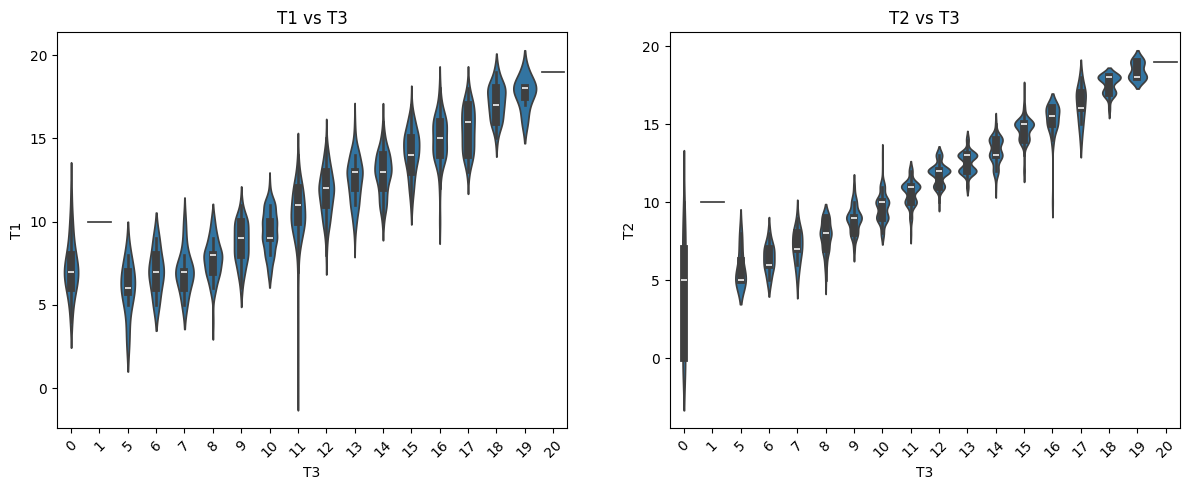

In [29]:
def multiple_violinplots(df, columnas_numericas, variable_objetivo, excluir=["faltas"]):
    columnas = [col for col in columnas_numericas if col not in excluir + [variable_objetivo]]
    n = len(columnas)
    n_cols = 2  
    n_rows = math.ceil(n / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        sns.violinplot(x=variable_objetivo, y=col, data=df, ax=axes[i])
        axes[i].set_title(f'{col} vs {variable_objetivo}', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)

    # Eliminar subplots vacíos
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(w_pad=4)  
    plt.show()

multiple_violinplots(df_train, ["T1", "T2"], variable_objetivo)

### Pairplots de T1, T2, T3 y suspensos : 

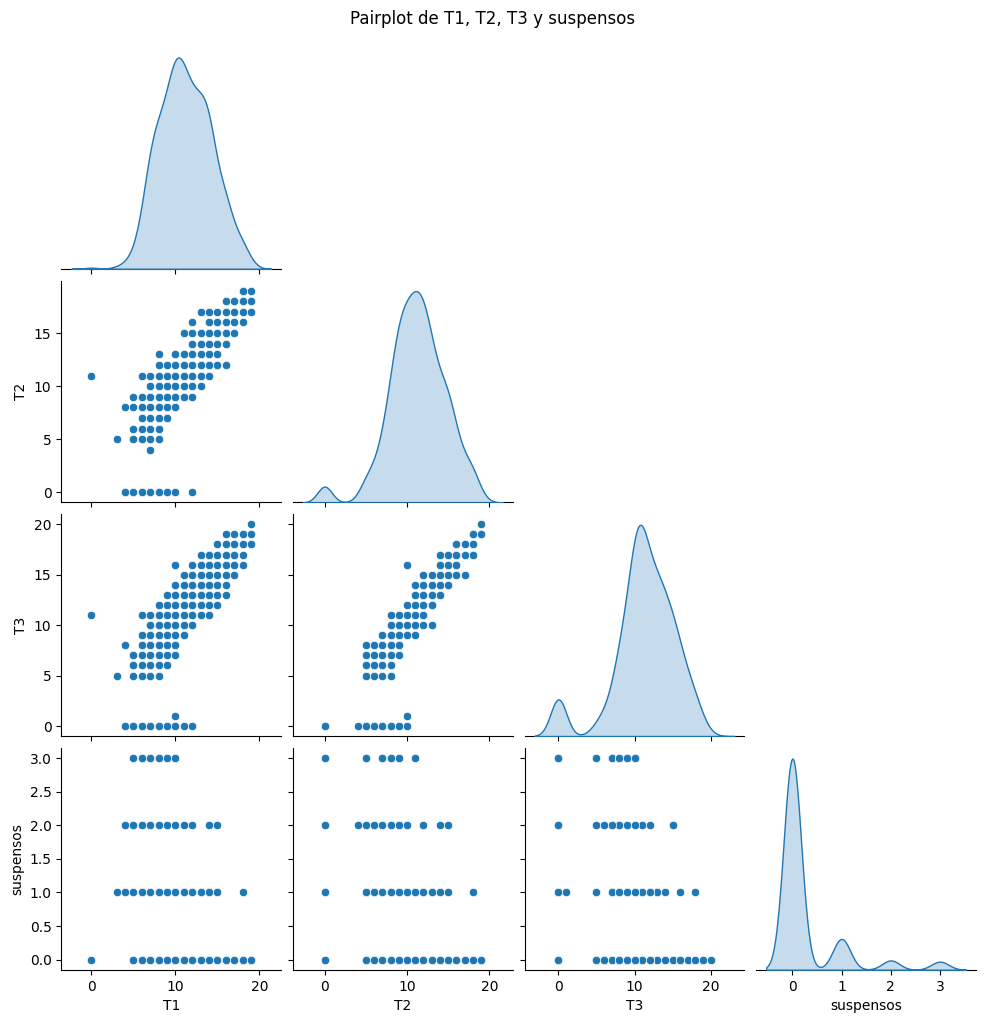

In [30]:
# Seleccionamos las columnas de interés
variables_interes = ['T1', 'T2', 'T3', 'suspensos']

# Creamos el pairplot
sns.pairplot(df_train[variables_interes], diag_kind="kde", corner=True)
plt.suptitle("Pairplot de T1, T2, T3 y suspensos", y=1.02)
plt.show()


Tanto los pairplots como los violin plots confirman la **alta correlación positiva** entre las variables **T1**, **T2** y **T3**. Esto refuerza la idea de que el desempeño en las evaluaciones previas (**T1** y **T2**) está estrechamente relacionado con la calificación final (**T3**). Esta apreciación es consistente con las observaciones previas realizadas en la matriz de correlaciones y los scatterplots.
